In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version trains using the MNIST dataset, then tests on our own images
# (c) Tariq Rashid, 2016
# license is GPLv2

In [15]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# scipy.ndimage for rotating image arrays
import scipy.ndimage
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [3]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

from neural_network import NeuralNetwork

In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [16]:
# train the neural network

# epochs is the number of times the training data set is used for training
# epochs = 10
epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        x = 10
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), x, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -x, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)

In [19]:
# test the neural network
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

In [20]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9635


In [7]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

loading ...  my_own_images\2828_my_own_2.png
0.01
1.0
loading ...  my_own_images\2828_my_own_3.png
0.01
1.0
loading ...  my_own_images\2828_my_own_4.png
0.01
0.93011767
loading ...  my_own_images\2828_my_own_5.png
0.01
0.86800003
loading ...  my_own_images\2828_my_own_6.png
0.01
1.0


[[3.18555303e-03]
 [2.58609626e-03]
 [1.56955184e-02]
 [2.67225967e-03]
 [9.44544127e-01]
 [1.43500614e-02]
 [3.22163040e-02]
 [1.52010039e-02]
 [4.27068334e-05]
 [6.51545795e-03]]
network says  4
match!


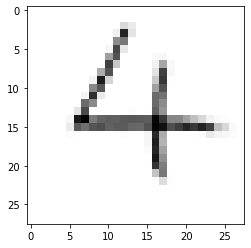

In [8]:
# test the neural network with our own images

# record to test
item = 2

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")

# backquery

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


<matplotlib.image.AxesImage object at 0x00000219497C0070>

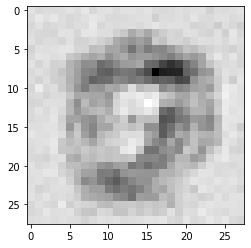

In [17]:
# run the network backwards, given a label, see what image it produces

# label to test
# label = 7
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')